# Import the dependencies

In [1]:
import pyforest  #lazy import "lazy_imports()"
import lux #  importing lux-api used for data exploration
lux.logger=True # Collecting basic usage statistics for lux
import warnings
warnings.filterwarnings(action= 'ignore')

#To activate the Jupyter notebook extension of lux api: jupyter nbextension install --py luxwidget
                                                    #jupyter nbextension enable --py luxwidget


In [2]:
lazy_imports()

['from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.ensemble import RandomForestRegressor',
 'import xgboost as xgb',
 'import pickle',
 'import dash',
 'import spacy',
 'import sklearn',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn import svm',
 'import seaborn as sns',
 'import awswrangler as wr',
 'from pyspark import SparkContext',
 'import plotly.graph_objs as go',
 'import altair as alt',
 'import gensim',
 'import bokeh',
 'import matplotlib.pyplot as plt',
 'import plotly.express as px',
 'import glob',
 'from sklearn.manifold import TSNE',
 'import nltk',
 'from dask import dataframe as dd',
 'import pydot',
 'import numpy as np',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from pathlib import Path',
 'import tensorflow as tf',
 'import datetime as dt',
 'import lightgbm as lgb',
 'import sys',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'i

# Importing the csv and loading it to pandas data frame

In [3]:
df=pd.read_csv("wine dataset.csv")


<IPython.core.display.Javascript object>

# Finding number of rows and columns in the dataset

In [4]:
df.shape

(1599, 12)

# First 5 Rows of the dataset

In [5]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Checking the missing values

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Data Analysis and Visualization

In [7]:
df.describe()# Statistical analysis of the data set

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

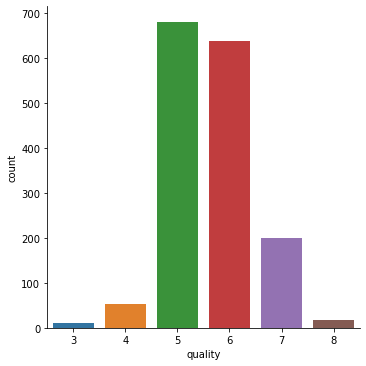

In [8]:
sns.catplot(x='quality', data=df, kind='count')#Number of values for each quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

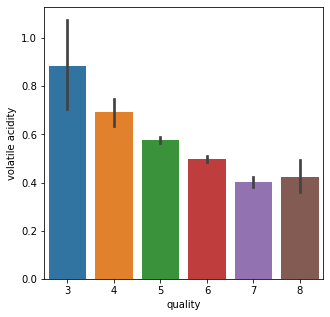

In [9]:
plot=plt.figure(figsize=(5,5))   # Plotting volatile acidity vs quality
sns.barplot(x='quality', data=df, y='volatile acidity')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

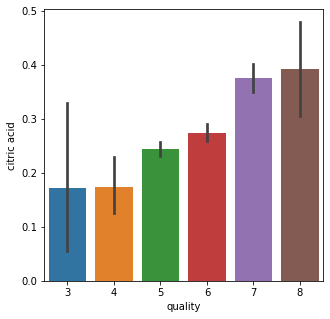

In [10]:
plot=plt.figure(figsize=(5,5))   # Plotting citric acid vs quality
sns.barplot(x='quality', data=df, y='citric acid')

# Visualization using lux-api

In [11]:
df.intent=["quality"] # visualization based on the dependent feature "quality"

In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
from lux.vis.VisList import VisList
VisList(["quality", "alcohol=?"],df)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: COUNT(Record), y: quality  -- [alcohol=9.4]                ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: quality  -- [alcohol=9.8]                ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: quality  -- [alcohol=10.0]               ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: quality  -- [alcohol=9.5]                ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: quality  -- [alcohol=10.5]               ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: quality  -- [alcohol=9.2]                ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: quality  -- [alcohol=9.9]                ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: quality  -- [alcohol=9.1]                ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: quality  -- [alcohol=9.3]                ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: quality  -- [alcohol=9.0]                ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Rec

#So from data analysis we came to the conclusion that volatile acidity value is inversely proportional to the quality and citric acid value is directly proportional to quality

# Correlation

In [14]:
corr=df.corr()

Constructing a heatmap to understand the correlation between the columns:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

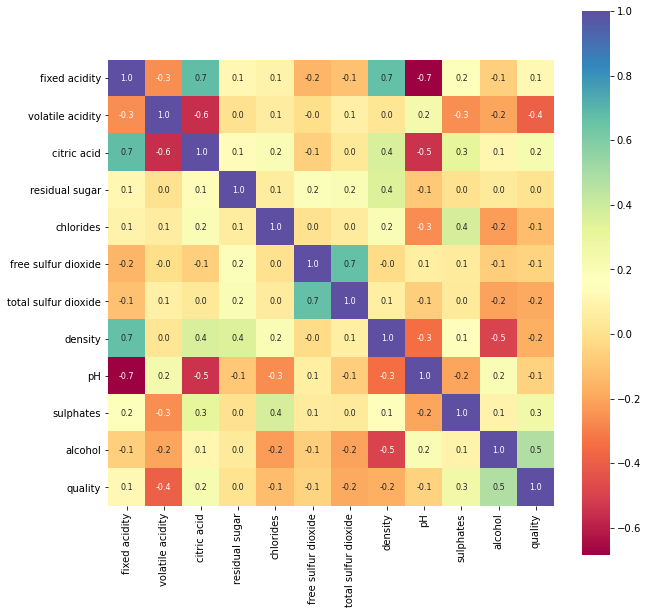

In [15]:
plot=plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Spectral')

# Data Preprocessing

In [16]:
# Seperate the data and the lable
X=df.drop('quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Label Encoding

In [17]:
Y=df['quality'].apply(lambda y:2 if y>=7 else (1 if  y>=4 else 0))
Y

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Train-Test Split

In [18]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)# random_state is used to reproduce the code exactly 

<IPython.core.display.Javascript object>

In [19]:
print(Y.shape, Y_train.shape, Y_test.shape) # Checking the shape of our train and test data split

(1599,) (1279,) (320,)


# Model Training

Random Forest Classifier:

In [20]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)

<IPython.core.display.Javascript object>

RandomForestClassifier()

# Model Evaluation
Accuracy Score:

In [21]:
Y_pred=model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
test_accuracy= accuracy_score(Y_pred,Y_test)
print('Accuracy:', test_accuracy)

Accuracy: 0.915625


# Building a Predictive System

In [23]:
#input_data=(11.6,0.41,0.54,1.5,0.095,22,41,0.99735,3.02,0.76,9.9)
#type(input_data)

In [24]:
# Converting the i/p data to Numpy array
#np_array=np.asarray(input_data)

In [25]:
# Reshaping the data in order to predict the label of a single instance
# If not reshaped, the model will get confused and will look for 1279 values of Y_train insted of a single instance
#data_reshaped=np_array.reshape(1,-1) 

In [26]:
#pred=model.predict(data_reshaped)
#print(pred)

In [27]:
#if (pred[0]==2):
    #print('Good Quality Wine')
#elif (pred[0]==1):
    #print('Fair Quality Wine')
#else:
    #print('Poor Quality Wine')


In [28]:
import pickle
file=open('Wine Quality Prediction.pkl', 'wb')
pickle.dump(model,file )